# Завдання 1 Граничні задач для звичайних диференціальних рівнянь другого порядку
## Завдання 1.3. Граничні умови 3-го роду (Робіна)

9) $ y'' + y'\sin x + y\cos x = e^x,\ x\in[0,\pi],\ y(0)+y'(0)=0,\ 2y(\pi)+y'(\pi)=1.$


### 1. Дискретизація області

Інтервал $[0, \pi]$ розбивається на $N$ підінтервалів з кроком

$$
h = \frac{\pi}{N}.
$$

Вузли сітки:

$$
x_i = i h, \quad i = 0, 1, 2, \ldots, N.
$$

---

### 2. Скінченні різниці

Друга похідна апроксимується **центральною різницею**:

$$
y''(x_i) \approx \frac{y_{i-1} - 2y_i + y_{i+1}}{h^2}.
$$

Перша похідна — **центральною різницею другого порядку точності**:

$$
y'(x_i) \approx \frac{y_{i+1} - y_{i-1}}{2h}.
$$

Підставимо ці апроксимації в рівняння:

$$
\frac{y_{i-1} - 2y_i + y_{i+1}}{h^2}
+ \frac{y_{i+1} - y_{i-1}}{2h}\sin(x_i)
+ y_i\cos(x_i) = e^{x_i},
$$

що дає лінійне рівняння відносно $y_{i-1}, y_i, y_{i+1}$:

$$\boxed{
\left(\frac{1}{h^2} - \frac{\sin(x_i)}{2h}\right)y_{i-1}
+ \left(-\frac{2}{h^2} + \cos(x_i)\right)y_i
+ \left(\frac{1}{h^2} + \frac{\sin(x_i)}{2h}\right)y_{i+1}
= e^{x_i}.}
$$

---

### 3. Формування системи рівнянь

У результаті формується тридіагональна система:

$$
A\,\mathbf{y} = \mathbf{b},
$$

де:
- $A$ — матриця коефіцієнтів (тридіагональна),
- $\mathbf{y}$ — вектор невідомих значень $y_i$,
- $\mathbf{b}$ — вектор правих частин $f_i$.

---

### 4. Граничні умови Робіна

Для лівої межі:

$$
y(0) + y'(0) = 0
\quad \Rightarrow \quad
y_0 + \frac{y_1 - y_0}{h} = 0
\quad \Rightarrow \quad \boxed{(1 - \tfrac{1}{h})y_0 + \tfrac{1}{h}y_1 = 0.}
$$

Для правої межі:

$$
2y(\pi) + y'(\pi) = 1
\quad \Rightarrow \quad
2y_N + \frac{y_N - y_{N-1}}{h} = 1
\quad \Rightarrow \quad
\boxed{-\tfrac{1}{h}y_{N-1} + (2 + \tfrac{1}{h})y_N = 1.}
$$

Ці рівняння додаються як перший та останній рядки у систему $A\,\mathbf{y} = \mathbf{b}$.


In [1]:
from solver import thomas 
import numpy as np
import matplotlib.pyplot as plt

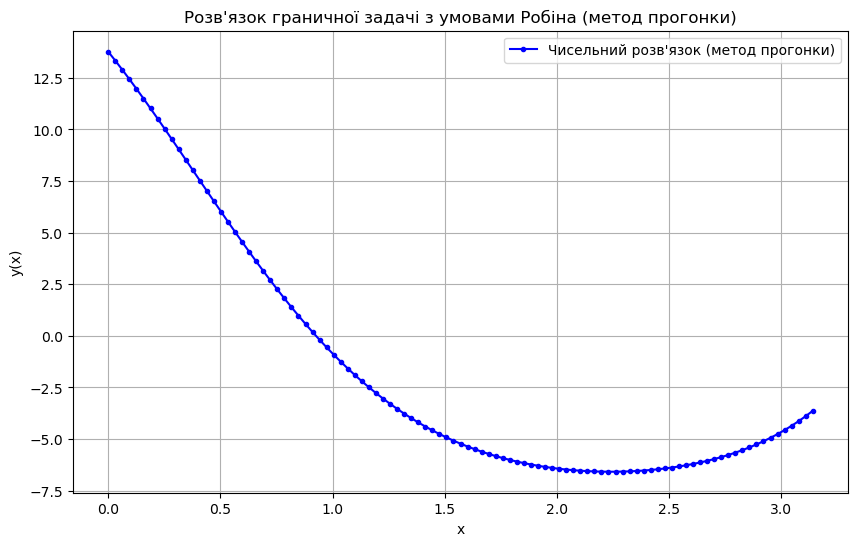

In [2]:
# --- 1. Налаштування параметрів ---
N = 100  # Кількість точок сітки
x = np.linspace(0, np.pi, N + 1)
h = np.pi / N

# --- 2. Формування коефіцієнтів тридіагональної системи ---
a = np.zeros(N + 1)  # піддіагональ (a[0] не використовується)
b = np.zeros(N + 1)  # головна діагональ
c = np.zeros(N + 1)  # наддіагональ (c[-1] не використовується)
d = np.zeros(N + 1)  # права частина

# --- 3. Заповнення рівнянь для внутрішніх точок ---
i = np.arange(1, N)
a[i] = 1/h**2 - np.sin(x[i]) / (2*h)
b[i] = -2/h**2 + np.cos(x[i])
c[i] = 1/h**2 + np.sin(x[i]) / (2*h)
d[i] = np.exp(x[i])

# --- 4. Застосування граничних умов ---
# Ліва межа
b[0] = 1 - 1/h
c[0] = 1/h
d[0] = 0.0

# Права межа
a[N] = -1/h
b[N] = 2 + 1/h
d[N] = 1.0

# --- 5. Розв'язання системи методом прогонки ---
y = thomas(a.copy(), b.copy(), c.copy(), d.copy())

# --- 6. Візуалізація результату ---
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Чисельний розв'язок (метод прогонки)", color='blue', marker='o', markersize=3, linestyle='-')
plt.title("Розв'язок граничної задачі з умовами Робіна (метод прогонки)")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.legend()
plt.show()
